## 1. Análise exploratória

Este é o primeiro script e *(como já falei outras vezes)* é o mais importante pois aqui conhecemos os elementos que compõe a base.

Neste script iremos explorar:
* Quais são as variáveis e o que elas significam
* Valores nulos
* Medidas descritivas
* Contagem da qualidade dos vinhos
* Distribuição das variáveis


In [40]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")


In [41]:
wht = pd.read_csv('winequality-white.csv', delimiter = ';')


In [42]:
wht.shape

# temos 4898 informações de fabricantes e 12 colunas

(4898, 12)

In [43]:
wht.info()
# todas as informações dos vinhos de fabricantes são numéricas só nossa target "quality" é inteira

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [44]:
print(" \nContagem de valores NaN : \n\n",  wht.isnull().sum())
# temos 0 valores nulos nas colunas

 
Contagem de valores NaN : 

 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [45]:
# descritivas das caracteristicas para as qualidades
wht.groupby('quality').agg({'fixed acidity':['mean', 'std'],	'volatile acidity':['mean'],	'citric acid':['mean'],	'residual sugar':['mean'],	'chlorides':['mean'],	'free sulfur dioxide':['mean'],	'total sulfur dioxide':['mean'],	'density':['mean'],	'pH':['mean'],	'sulphates':['mean'],	'alcohol':['mean']})

fixed acidity           volatile acidity citric acid residual sugar  \
                 mean       std             mean        mean           mean   
quality                                                                       
3            7.600000  1.724743         0.333250    0.336000       6.392500   
4            7.129448  1.081490         0.381227    0.304233       4.628221   
5            6.933974  0.838433         0.302011    0.337653       7.334969   
6            6.837671  0.837442         0.260564    0.338025       6.441606   
7            6.734716  0.755670         0.262767    0.325625       5.186477   
8            6.657143  0.819337         0.277400    0.326514       5.671429   
9            7.420000  0.983362         0.298000    0.386000       4.120000   

        chlorides free sulfur dioxide total sulfur dioxide   density  \
             mean                mean                 mean      mean   
quality                                                                
3        0.054300           53.325000           170.600000  0.994884   
4        0.050098           23.358896           125.279141  0.994277   
5        0.051546           36.432052           150.904598  0.995263   
6        0.045217           35.650591           137.047316  0.993961   
7        0.038191           34.125568           125.114773  0.992452   
8        0.038314           36.720000           126.165714  0.992236   
9        0.027400           33.400000           116.000000  0.991460   

               pH sulphates    alcohol  
             mean      mean       mean  
quality                                 
3        3.187500  0.474500  10.345000  
4        3.182883  0.476135  10.152454  
5        3.168833  0.482203   9.808840  
6        3.188599  0.491106  10.575372  
7        3.213898  0.503102  11.367936  
8        3.218686  0.486229  11.636000  
9        3.308000  0.466000  12.180000

É possível observar que apenas olhando a média simples e o desvio padrão (que foi menor que a média) as informações de qualidade nas características são bem próximas, isso pode reusltar em um problema para o algoritmo ver quem é quem, isso pode ser causado por um desbalanceamento da amostra mas conseguimos ver que as qualidades 3, 4,  9 são as de maiores métricas, isso deve ser melhor estudado à frente.

<AxesSubplot:xlabel='quality', ylabel='count'>

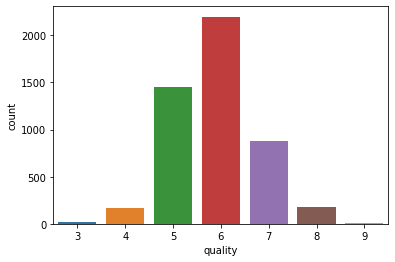

In [46]:
# Contagem de observações por qualidade
sns.countplot(x='quality',data=wht)


O que hipotetizamos acima nas descritivas é real, os dados estao desbalanceados, até mais que eu imaginava, vamos ver quantos % para cada qualidade com a cross table.

In [47]:
cross = wht.groupby('quality')['density'].count().reset_index()
cross['pct'] = cross['density']/np.sum(cross['density']) *100
cross

,quality,density,pct
0,3,20,0.408330
1,4,163,3.327889
2,5,1457,29.746835
3,6,2198,44.875459
4,7,880,17.966517
5,8,175,3.572887
6,9,5,0.102082


Ao observar as % por qualidade vemos que a qualidade 3 e 9 são as de pior participação tendo respectivamente 0,40%  e 0,10% em contrapartida só as qualidades 5 e 6 já representam aproximadamente 74% dos dados. Seguiremos com o exploratorio mas devemos ter isto em mente para a hora dos modelos.

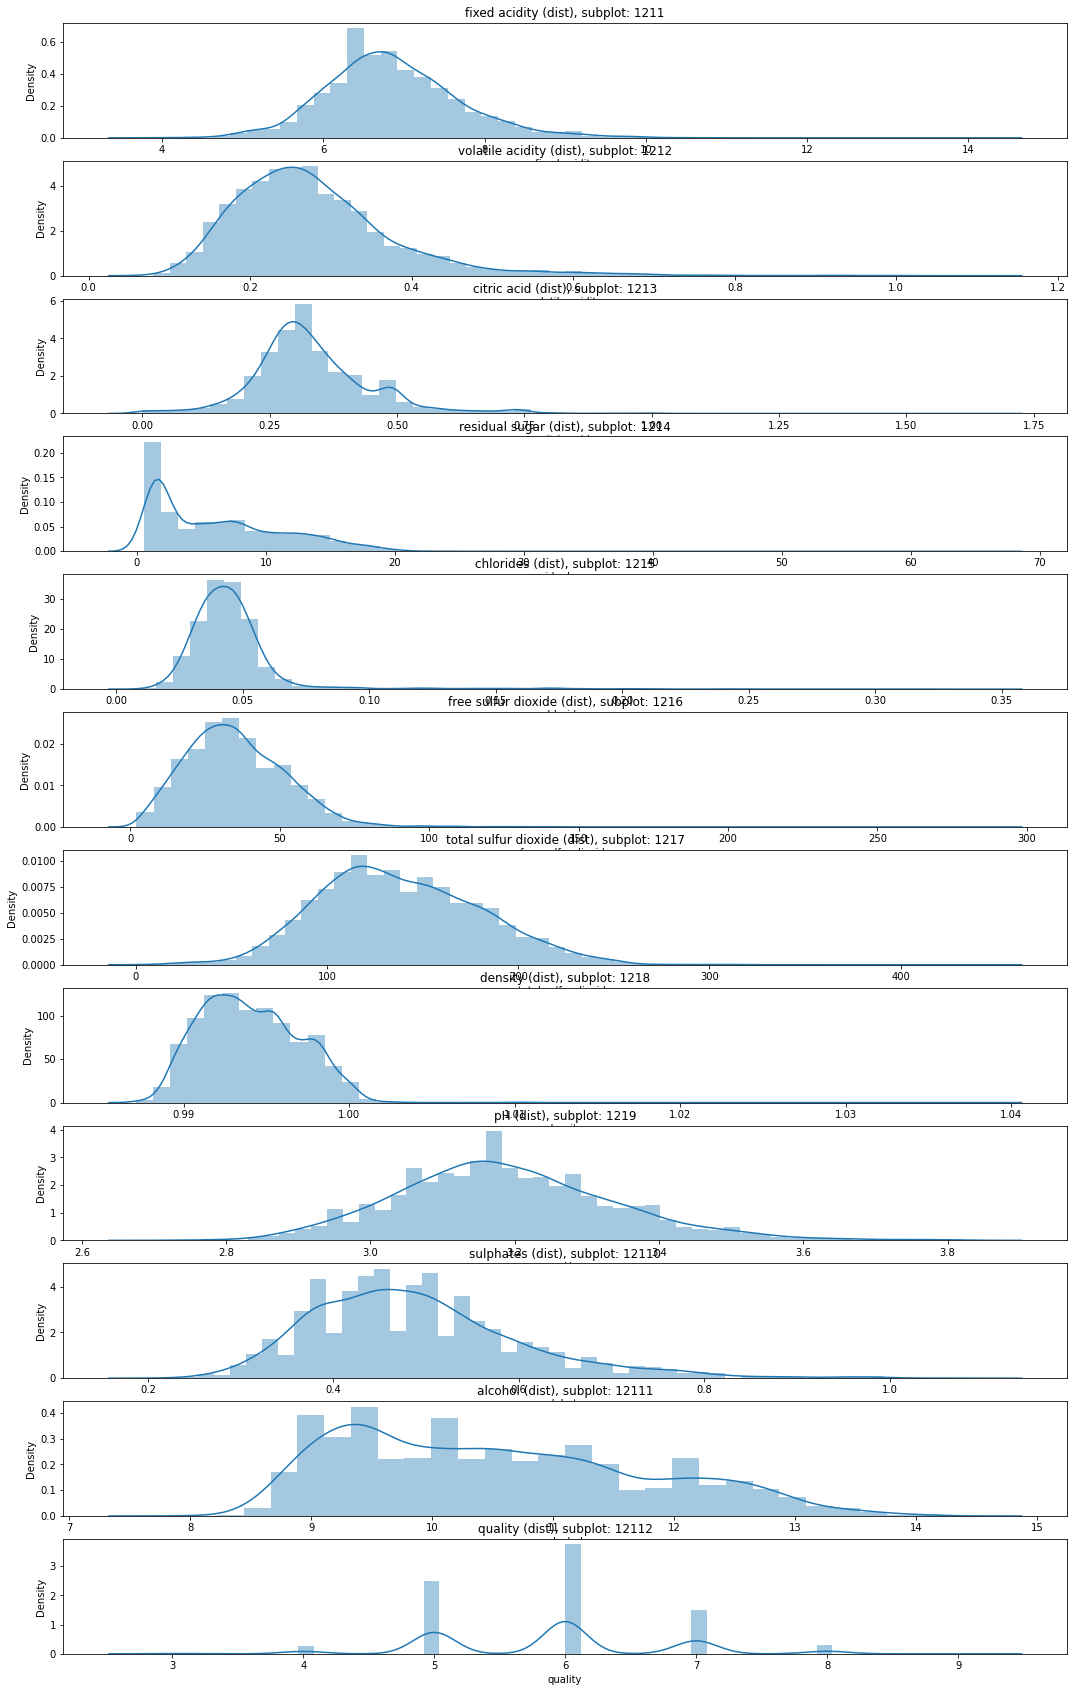

In [48]:
#Histrograma e curva de densidade

a = 12
b = 1
c = 1

colunas_df = wht.columns
fig = plt.figure(figsize=(18,30))

for i in colunas_df:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(wht[i])
    c = c + 1

plt.show()

A maioria das características parecem bem distribuidas, o que é uma ótima noticia em meio a base desbalanceada, iremos dar uma olhada para além dos histrogramas e densidade, nos boxplot e identificar outliers.

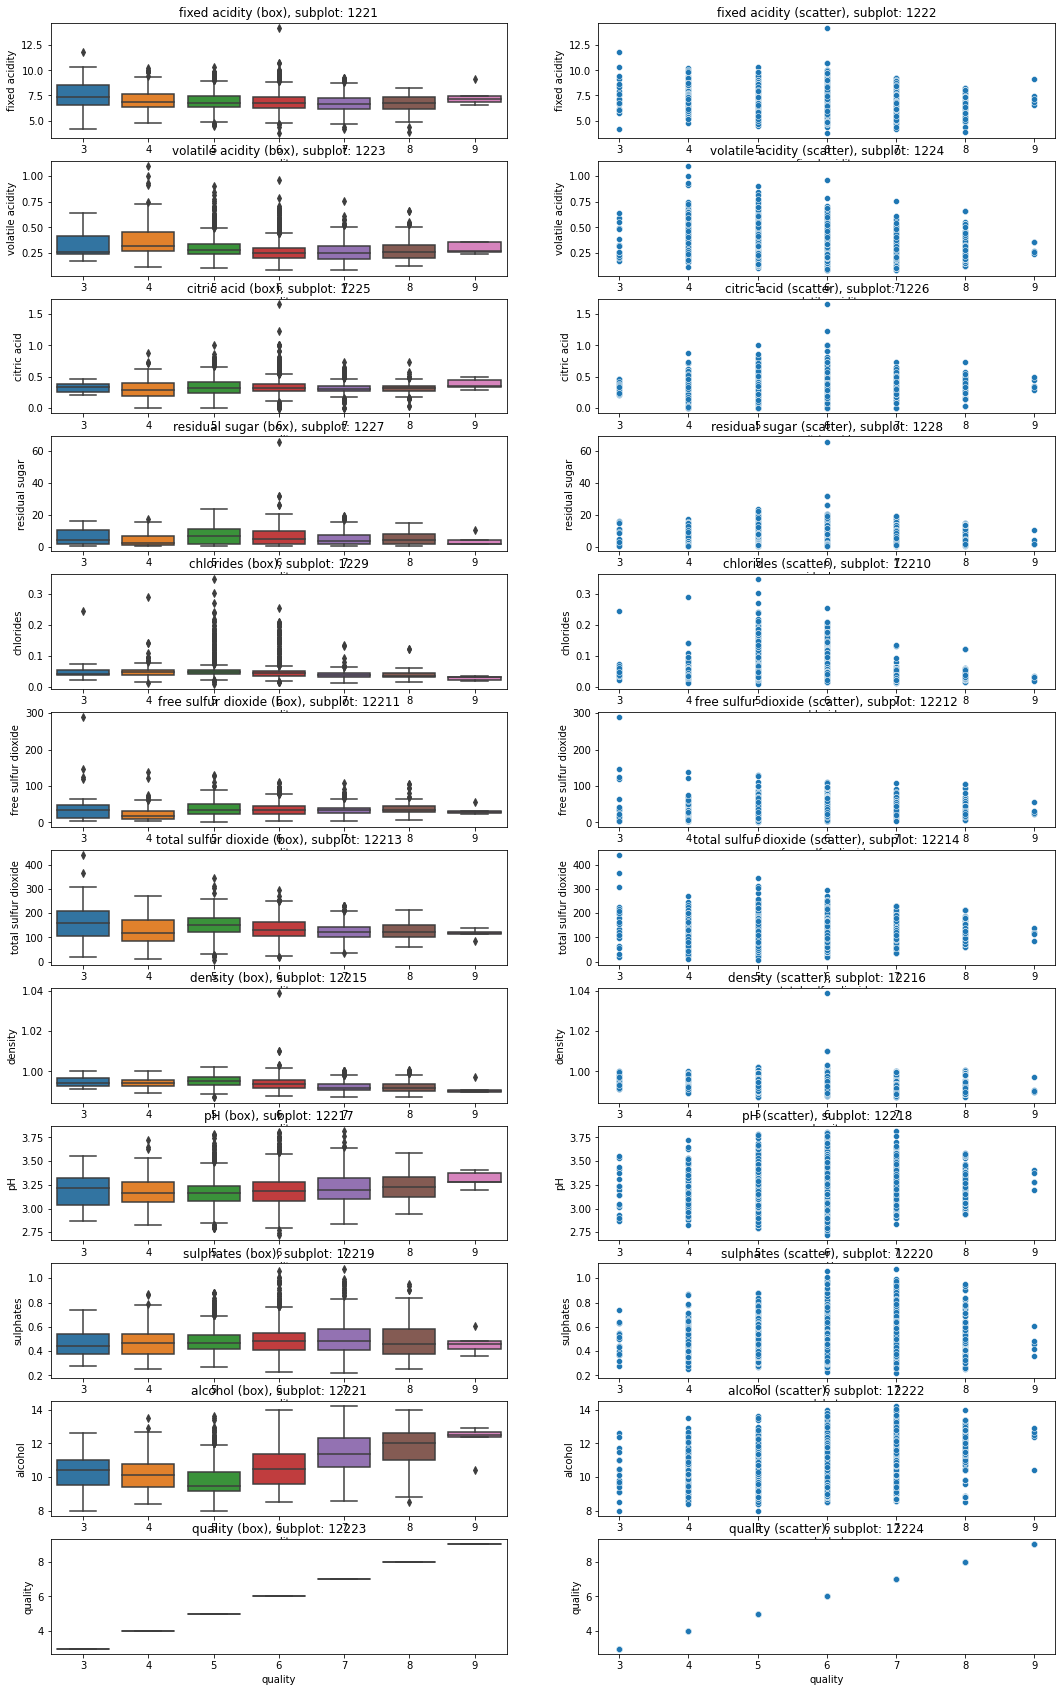

In [49]:
#Box plot

a = 12  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18,30))

for i in colunas_df:
    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data = wht, x = 'quality', y = wht[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (scatter), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(data = wht, x = 'quality', y = wht[i])
    c = c + 1

plt.show()

É observavél que com exceção da qualidade 3 e 9 (talvez pela representatividade dos dados) as outras qualidade apresentam outliers na base, por enquanto iremos manter e continuaremos assim devido a já termos que mexer nos dados, se isto afetar a performance do modelo voltamos a este passo.

In [50]:
wht.to_csv('data_clean.csv', index = False)